# Data Collection

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~./kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Preprocessing

In [ ]:
# Load data from csv file to pandas dataframe and rename the columns
columns_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names = columns_names, encoding = 'ISO-8859-1')

In [ ]:
# Number of rows and columns
twitter_data.shape

(1599999, 6)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Convert target 4 to 1 (Tweets have been annotated to 0 = negative, 4 = positive)
twitter_data.replace({'target': {4:1}}, inplace=True)

In [ ]:
# Stemming: reducing a word to its root word
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)  # Remove non-alphabet characters
  stemmed_content = stemmed_content.lower().split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
  return ' '.join(stemmed_content)

In [ ]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

In [ ]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [ ]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [ ]:
twitter_data.drop(['text'], axis =1,inplace = True)

In [ ]:
# Assign x as the text, y for the sentiments
x = twitter_data['stemmed_content'].values
y = twitter_data['target'].values

In [ ]:
# Splitting the data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
# Converting textual data to numerical data
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Model Performance

In [ ]:
# Training the Model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Accuracy score on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy score on training data:", training_data_accuracy)

Accuracy score on training data: 0.7999984375


In [ ]:
# Accuracy score on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print("Accuracy score on test data:", test_data_accuracy)

Accuracy score on test data: 0.776796875


# Visualization

<ipython-input-113-b1ea932b8b03>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


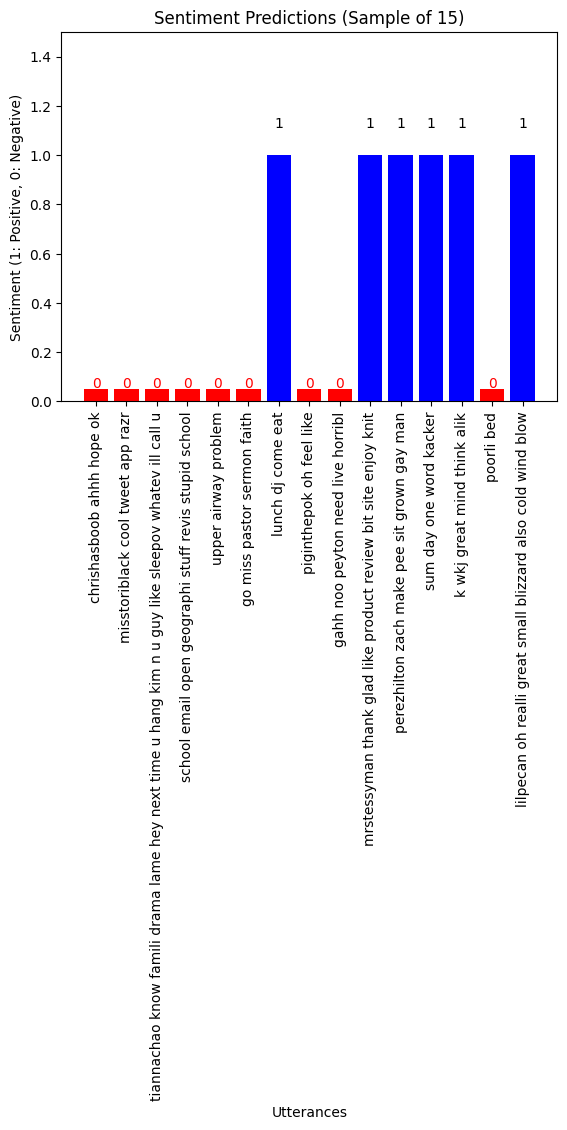

In [ ]:
import matplotlib.pyplot as plt

# Get only 15 samples from the data
sample_data = twitter_data.sample(n=15, random_state=42)
sample_predictions = sample_data['target'].values
sample_utterances = sample_data['stemmed_content'].values

# Adjust the heights to make sure 0 sentiment shows up
adjusted_predictions = np.where(sample_predictions == 0, 0.05, sample_predictions)

# Create a bar graph
colors = ['blue' if pred == 1 else 'red' for pred in sample_predictions]
bars = plt.bar(range(len(sample_utterances)), adjusted_predictions, color=colors)

plt.title('Sentiment Predictions (Sample of 15)')
plt.xlabel('Utterances')
plt.ylabel('Sentiment (1: Positive, 0: Negative)')
plt.ylim(0.0, 1.5)
plt.xticks(range(len(sample_utterances)), sample_utterances, rotation=90)

# Display the actual sentiment values as text above the bars
for i, bar in enumerate(bars):
    pred = sample_predictions[i]
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1 if pred == 1 else 0.1,
             str(pred), ha='center', va='bottom' if pred == 1 else 'top',
             color='red' if pred == 0 else 'black')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()